# Chargement et visualisation de séries temporelles

L'objectif est d'étudier la consommation électrique d'un particulier. Le fichier de données (disponible dans `../../data/Time-Series/household_power_consumption.zip`) possède les informations suivantes :

- date: Date au format dd/mm/yyyy
- time: heure au format hh:mm:ss
- global_active_power: puissance active consommeée (en kilowatt)
- global_reactive_power: puissance réactive consommée (en kilowatt)
- voltage: tension (en volt)
- global_intensity: intensité (en ampere)
- sub_metering_1: consommation de la cuisine (en watt-heure).
- sub_metering_2: consommation de la buanderie (en watt heure)
- sub_metering_3: consommation du chauffe-eau et de l'air conditionné (watt heure)


In [1]:
import pandas as pd

Le fichier utilise des `';'` comme séparateurs et la première ligne indique les noms des colonnes. On va indiquer à *Pandas* qu'il faut utiliser les colonnes d'indices `0` et `1` pour créer une colonne `date` (qui sera utilisée comme index).

In [11]:
df = pd.read_csv("../../data/Time-Series/household_power_consumption.zip", sep=";",header=0,
                 infer_datetime_format=True,  parse_dates={'date': [0, 1]})
df=df.set_index('date')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


On constate que la plupart des colonnes ne sont pas au format numérique attendu, sans doute parce que les valeurs manquantes sont codées par une chaîne de caractères (en l'occurrence `'?'`) qui n'est pas automatiquement reconnues par *Pandas*.

On va parcourir toutes les colonnes et les convertir en nombres ou en *valeurs manquantes* si la conversion est impossible (`errors='coerce'`) :

In [19]:
for i in range(df.shape[1]):
    df.iloc[:,i]= pd.to_numeric(df.iloc[:,i], errors='coerce')

In [28]:
df[:'2006']

Global_active_power  Global_reactive_power  Voltage  \
date                                                                       
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2006-12-31 23:55:00                2.574                  0.132   241.89   
2006-12-31 23:56:00                2.576                  0.132   242.06   
2006-12-31 23:57:00                2.586                  0.134   242.61   
2006-12-31 23:58:00                2.648                  0.212   241.93   
2006-12-31 23:59:00                2.646                  0.236   241.89   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
date                                                                    
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   
...                               ...             ...             ...   
2006-12-31 23:55:00              10.6             0.0             0.0   
2006-12-31 23:56:00              10.6             0.0             0.0   
2006-12-31 23:57:00              10.6             0.0             0.0   
2006-12-31 23:58:00              11.0             0.0             0.0   
2006-12-31 23:59:00              11.0             0.0             0.0   

                     Sub_metering_3  
date                                 
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0  
...                             ...  
2006-12-31 23:55:00             0.0  
2006-12-31 23:56:00             0.0  
2006-12-31 23:57:00             0.0  
2006-12-31 23:58:00             0.0  
2006-12-31 23:59:00             0.0  

[21996 rows x 7 columns]

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

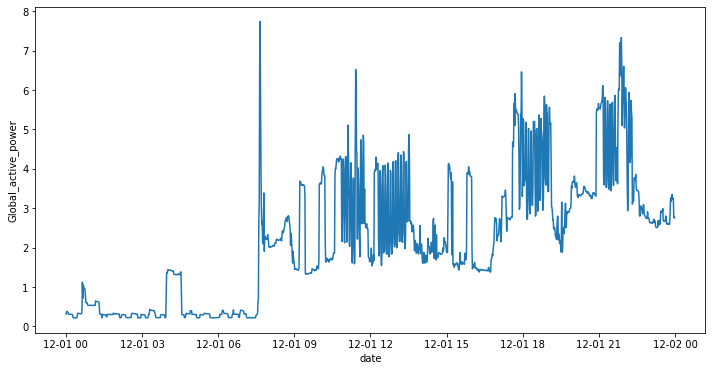

In [40]:
sns.lineplot(x=df.loc['2007-12-01'].index, y='Global_active_power',data=df.loc['2007-12-01']);